**IMPLEMENTATION OF A THREE HIDDEN LAYER NEURAL NETWORK FOR MULTI-CLASS CLASSIFICATION**

Neural network receives input, process it, and pass it on to the next layer. Each neuron is associated with a weight, which adjusts during training to influence the output. The first layer that receives the input data. The number of neurons here matches the number of features in the input data. Layers between the input and output layers where the actual computation happens. These layers allow the network to learn complex patterns. The final layer that produces the output of the network, which could be a prediction, classification, or some other decision.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

### **Dataset Generation**

A synthetic dataset was generated using Microsoft Excel for 5 distinct classes using some random numbers ranging from 0 to 99

In [2]:
df = pd.read_csv("/content/drive/MyDrive/CVPR/mid/csv/data3.csv")                               # Reads a CSV (Comma-Separated Values) file into a Pandas DataFrame.
df.head()                                                                                       # Displays the first few rows of the DataFrame
df.head(df.shape[0])                                                                            # Displays all the rows of the DataFrame

,X,Y,LABEL
0,-13,-96,2
1,-42,80,1
2,-41,-21,1
3,-7,-70,2
4,90,-33,4
...,...,...,...
295,-100,17,0
296,-12,-39,2
297,-72,36,0
298,68,-20,4


**1 - Hot Encoding**

One-hot encoding is a method used to represent categorical data as binary vectors. In multi-class classification, the output layer of a neural network often uses the activation function, which outputs a probability distribution over classes. One-hot encoded labels make it easy to compute the loss. Therefore normalizing the output for 5 distinct classes that will return a specific list on each case.

In [3]:
def normalize(input):
  if input == 0:                            # Class 0
    return [1, 0, 0, 0, 0]
  elif input == 1:                          # Class 1
    return [0, 1, 0, 0, 0]
  elif input == 2:                          # Class 2
    return [0, 0, 1, 0, 0]
  elif input == 3:                          # Class 3
    return [0, 0, 0, 1, 0]
  elif input == 4:                          # Class 4
    return [0, 0, 0, 0, 1]

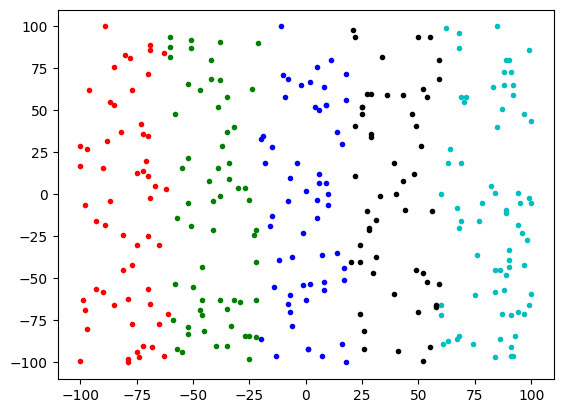

In [4]:
X1 = df["X"].values.tolist()                                  # Extracts the values from the column and converts into a list
X2 = df["Y"].values.tolist()                                  # Extracts the values from the column and converts into a list
Y = df["LABEL"].values.tolist()                               # Extracts the values from the column and converts into a list

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "r.")
    elif Y[i] == 1:
        plt.plot(X1[i], X2[i], "g.")
    elif Y[i] == 2:
        plt.plot(X1[i], X2[i], "b.")
    elif Y[i] == 3:
        plt.plot(X1[i], X2[i], "k.")
    else:
        plt.plot(X1[i], X2[i], "c.")

In [5]:
# Testing
print(Y)

[2, 1, 1, 2, 4, 3, 2, 4, 4, 3, 1, 4, 3, 1, 2, 2, 0, 2, 4, 2, 0, 0, 0, 2, 3, 1, 4, 2, 0, 0, 0, 1, 1, 3, 2, 1, 4, 3, 4, 2, 3, 1, 2, 2, 1, 0, 0, 3, 4, 4, 1, 4, 0, 0, 1, 1, 4, 4, 2, 2, 4, 1, 0, 2, 4, 2, 4, 4, 4, 0, 4, 2, 4, 3, 4, 2, 4, 0, 1, 1, 3, 4, 1, 3, 4, 2, 2, 3, 4, 0, 0, 4, 2, 2, 0, 1, 0, 2, 4, 4, 3, 3, 1, 4, 4, 4, 1, 0, 1, 3, 3, 1, 0, 4, 3, 1, 0, 4, 0, 3, 1, 0, 0, 0, 0, 0, 2, 1, 2, 4, 1, 4, 0, 0, 1, 3, 2, 1, 1, 4, 1, 1, 0, 1, 2, 0, 1, 2, 1, 2, 1, 4, 2, 0, 2, 3, 2, 4, 2, 2, 4, 3, 2, 4, 3, 3, 0, 0, 4, 0, 4, 0, 0, 0, 2, 3, 1, 3, 3, 1, 4, 4, 3, 3, 3, 2, 4, 2, 3, 3, 1, 0, 3, 2, 2, 2, 0, 0, 3, 1, 2, 1, 3, 4, 1, 3, 3, 4, 3, 0, 4, 3, 4, 1, 3, 3, 4, 1, 2, 4, 4, 1, 4, 2, 4, 1, 3, 0, 0, 4, 0, 4, 4, 1, 2, 1, 3, 1, 1, 0, 2, 3, 1, 1, 0, 3, 0, 4, 2, 1, 1, 4, 0, 1, 2, 0, 3, 0, 2, 1, 4, 3, 3, 2, 4, 4, 1, 0, 3, 0, 2, 1, 2, 3, 2, 0, 3, 3, 2, 4, 4, 3, 1, 1, 0, 0, 1, 1, 4, 3, 4, 4, 4, 4, 2, 0, 2, 0, 4, 2]


In [6]:
features = list(zip(X1, X2))                                        # Zips the 2 input features into a list
features_np = np.array(features)                                    # Converts the list into a numpy array

In [7]:
Y2 = np.array([normalize(i) for i in Y])                            # Turning it into a numpy array

**Split Dataset**

Splitting the generated dataset into training and testing set. The first `200` data points from numpy array `features_np` for training of the network, and the last `100` data points from numpy array `features_np` for testing of the network

In [8]:
features_train = features_np[:200]                                  # Training
Y2_train = Y2[:200]

features_test = features_np[200:]                                   # Testing
Y2_test = Y2[200:]

In [9]:
# print(features_train)
# print(Y_test)

### **Code Modification**

According to requirements the neural network should have 3 hidden layers, 5 distinct classes, 5 output layer neurons, multiple activation functions

In [10]:
class NeuralNetwork(object):
    def __init__(self, inputLayerNeurons = 2,
                 hiddenLayer1Neurons = 10,
                 hiddenLayer2Neurons = 10,
                 hiddenLayer3Neurons = 10,
                 outLayerNeurons = 5,
                 learning_rate = 0.01,
                 activation_type: str = 'sigmoid'):

        self.activation_type = activation_type
        self.learning_rate = learning_rate

        # Random weight initialization
        self.W_IH1 = np.random.randn(inputLayerNeurons,
                                     hiddenLayer1Neurons)                                       # Initializes the weights between the input layer and the first hidden layer using a random normal distribution

        self.W_H1H2 = np.random.randn(hiddenLayer1Neurons,
                                      hiddenLayer2Neurons)                                      # Initializes the weights between the first hidden layer and the second hidden layer

        self.W_H2H3 = np.random.randn(hiddenLayer2Neurons,
                                      hiddenLayer3Neurons)                                      # Initializes the weights between the first hidden layer and the second hidden layer

        self.W_H3O = np.random.randn(hiddenLayer3Neurons,
                                     outLayerNeurons)                                           # Initializes the weights between the third hidden layer and the output layer



    def activation(self, x, der=False):                                                         # Activation function to the input x
        if self.activation_type == 'sigmoid':                                                   # Sigmoid activation function
            if der == True:
                return x * (1 - x)
            else:
                return 1 / (1 + np.exp(-x))

        if self.activation_type == "tanh":                                                      # Hyperbolic tangent (tanh) activation function
            if der == True:
                return 1 - (np.tanh(x))**2                      # 1 - (tanh(x))^2
            else:
                return np.tanh(x)

        if self.activation_type == "relu":                                                      # Rectified Linear Unit (ReLU) activation function
            if der == True:
                return np.where(x > 0, 1, 0)
            else:
                return np.maximum(0, x)

        if self.activation_type == "gaussian":                                                  # Gaussian activation function
            if der == True:
                return -(2 * x * np.exp(-x**2))                 # -2xe^(-x^2)
            else:
                return np.exp(-x**2)                            # e^(-x^2)


    # This method computes the output of the network given input X by propagating the input forward through the network layers.
    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_IH1)
        self.hidden1_output = self.activation(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.W_H1H2)
        self.hidden2_output = self.activation(hidden2_input)

        hidden3_input = np.dot(self.hidden2_output, self.W_H2H3)
        self.hidden3_output = self.activation(hidden3_input)

        output_input = np.dot(self.hidden3_output, self.W_H3O)
        pred = self.activation(output_input)

        return pred


    # This method updates the weights of the network by performing the backpropagation algorithm.
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.activation(pred, der=True)

        hidden3_error = output_delta.dot(self.W_H3O.T)
        hidden3_delta = self.learning_rate * hidden3_error * self.activation(self.hidden3_output, der=True)

        hidden2_error = hidden3_delta.dot(self.W_H2H3.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.activation(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H1H2.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.activation(self.hidden1_output, der=True)

        self.W_IH1 += X.T.dot(hidden1_delta)
        self.W_H1H2 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H2H3 += self.hidden2_output.T.dot(hidden3_delta)
        self.W_H3O += self.hidden3_output.T.dot(output_delta)

    # Trains the network on the input data X with the corresponding labels Y
    def train(self, X, Y):
        output = self.feedForward(X)                                                    # To get the predicted output
        self.backPropagation(X, Y, output)                                              # Adjusts the weights through backpropagation.

### **Training and Testing**

In [11]:
NN = NeuralNetwork(activation_type = 'sigmoid')
# NN = NeuralNetwork(activation_type ='tanh')
# NN = NeuralNetwork(activation_type = 'gaussian')
# NN = NeuralNetwork(activation_type = 'relu')

Epoch: 0, error: 0.36001511128143626
Epoch: 10000, error: 0.11155816726497261
Epoch: 20000, error: 0.10736578163442269
Epoch: 30000, error: 0.10417559401329836
Epoch: 40000, error: 0.10132684563159347
Epoch: 50000, error: 0.09920703551444549
Epoch: 60000, error: 0.09797635564511177
Epoch: 70000, error: 0.09721749159245498
Epoch: 80000, error: 0.0966317253840464
Epoch: 90000, error: 0.09609905524352012


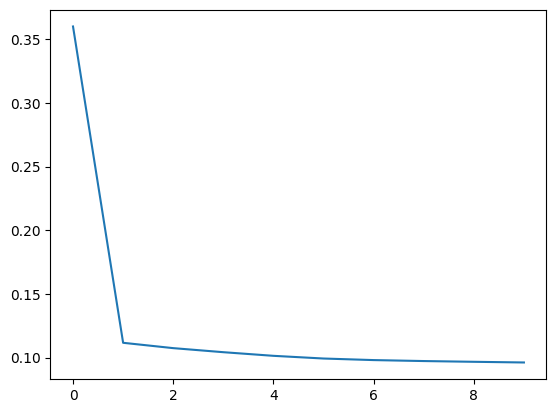

In [12]:
err_list = []                                                                       # Store the error values at specific intervals during training.

for i in range(100000):
    NN.train(features_train, Y2_train)
    err = np.mean(np.square(Y2_train - NN.feedForward(features_train)))

    if i % 10000 == 0:
        err_list.append(err)
        print(f'Epoch: {i}, error: {err}')

plt.plot(err_list)
plt.show()

### **Documentation**

**Modifications made**

1. `outLayerNeurons` value changed from 1 to 5 for 5 seperate classes.
2. Added `hiddenLayer2Neurons` and `hiddenLayer3Neurons` for achieveing 3 HL neural network.
3. Added `W1H2` and `W2H3` for handling wights of `hiddenLayer2Neurons` and `hiddenLayer3Neurons`
4. `sigmoid` function had the least amount of error. Added 3 more activation functions, `tanh`, `reLU` & `gaussian` in which the `reLU` performed very poorly.
5. In forward propagation `hidden2_input`, `hidden2_output`, `hidden3_input`, `hidden3_output` were calculated. These were added for the additional 2 hidden layers to the network.
6. In backpropagation `hidden3_error`, `hidden2_error`, `hidden3_delta`, `hidden2_delta` were calculated.

**Challenges**

1. Determining the number of layers, neurons in each layer, and how they connected was tricky.
2. Biases was added initially to check the performance however it reduced the accuracy in this particular case therefore it was removed.
3. Choosing the appropriate activation function (sigmoid, tanh, ReLU, etc.) for the network layers is crucial, as it affects the network's ability to learn complex patterns.







### **Results and Analysis**

In [13]:
def getProb(pred):                                                                          # Stores a dict with the probability of each class with its class name
    return {f'Class - {index}': p*100 for index, p in enumerate(pred)}

In [14]:
def getClass(dict):                                                                         # Returns the dict key with the highest probablity
    max_key = max(dict, key=dict.get)
    return (max_key)

**Random Input**

In [15]:
pred = NN.feedForward([75,-33])
print(pred)
print(getProb(pred))
print(getClass(getProb(pred)))

[7.52399653e-06 2.04208929e-06 2.90732119e-06 1.56258790e-01
 8.93594154e-01]
{'Class - 0': 0.0007523996528170704, 'Class - 1': 0.00020420892870134404, 'Class - 2': 0.0002907321187725865, 'Class - 3': 15.62587902465758, 'Class - 4': 89.35941543764466}
Class - 4


**Accuracy, Precision, Recall, F1-Score**

`Accuracy`: A scalar value representing the percentage of correct predictions out of all predictions.

`Precision`: Precision for a class is the ratio of true positive predictions to the sum of true positive and false positive predictions for that class.

`Recall`: Recall is the ratio of true positive predictions to the sum of true positive and false negative predictions for each class.

`F1-Score`: The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics.

In [16]:
predictions = NN.feedForward(features_test)
# print(f"Predictions: {predictions}")                                                      # Display the raw predictions made by the neural network.


Y_true = np.argmax(Y2_test, axis=1)                                                         # Converts the one-hot encoded true labels (Y2_test) into their corresponding class indices. A 1D array
Y_pred = np.argmax(predictions, axis=1)                                                     # Converts the predicted probabilities into predicted class indices. A 1D array

accuracy = accuracy_score(Y_true, Y_pred)
print(f"Overall Accuracy: {accuracy}")

precision = precision_score(Y_true, Y_pred, average=None)
print("Precision for each class:")
for i, score in enumerate(precision):
    print(f"Class {i}: {score}")

recall = recall_score(Y_true, Y_pred, average='macro')
print(f"Recall: {recall}")

f1 = f1_score(Y_true, Y_pred, average='macro')
print(f"F1 Score overall: {f1}")

Overall Accuracy: 0.54
Precision for each class:
Class 0: 0.4642857142857143
Class 1: 0.5
Class 2: 0.5555555555555556
Class 3: 0.43478260869565216
Class 4: 0.7894736842105263
Recall: 0.5524866310160428
F1 Score overall: 0.5331777418507924


**F1 score for each class**

In [17]:
f1_scores = f1_score(Y_true, Y_pred, average=None)

print("F1 Scores for each class:")
for i, score in enumerate(f1_scores):
    print(f"Class {i}: {score}")

F1 Scores for each class:
Class 0: 0.5777777777777777
Class 1: 0.3529411764705882
Class 2: 0.5882352941176471
Class 3: 0.46511627906976744
Class 4: 0.6818181818181819


**Confusion matrix**

A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix summarizes a classification model's performance, with entries representing true positive, true negative, false positive, and false negative instances, providing insights into model accuracy and errors.

In [18]:
def conf(Y_true, Y_pred, c = 'magma'):
    conf_matrix = confusion_matrix(Y_true, Y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plotting
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=c)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

**ROC graph**

In [19]:
def roc_plot(Y2_test, Y_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(Y2_test.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(Y2_test[:, i], Y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #ROC curve for each class
    for i in range(Y2_test.shape[1]):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [20]:
predictions = NN.feedForward(features_test)

Y_true = np.argmax(Y2_test, axis=1)
Y_pred = np.argmax(predictions, axis=1)

Confusion Matrix:
[[13  4  0  0  0]
 [15  6  1  0  0]
 [ 0  2 10  4  0]
 [ 0  0  6 10  4]
 [ 0  0  1  9 15]]


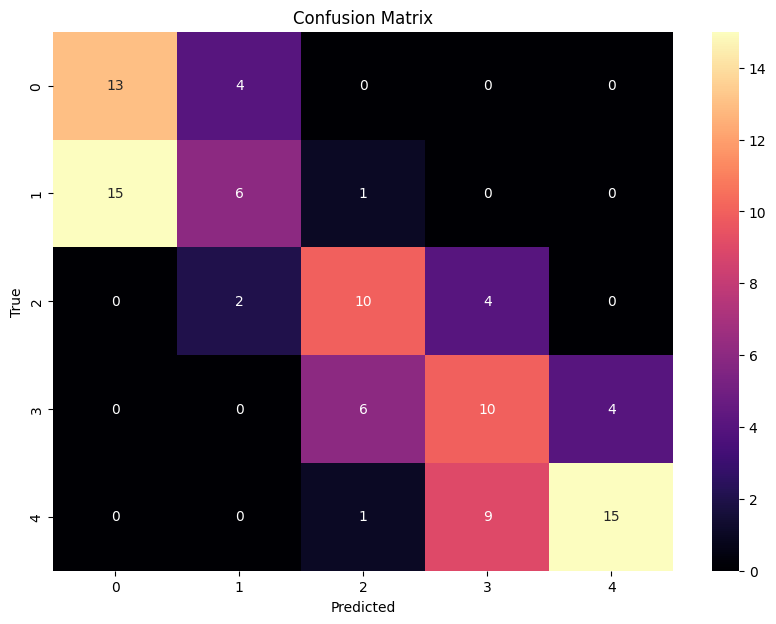

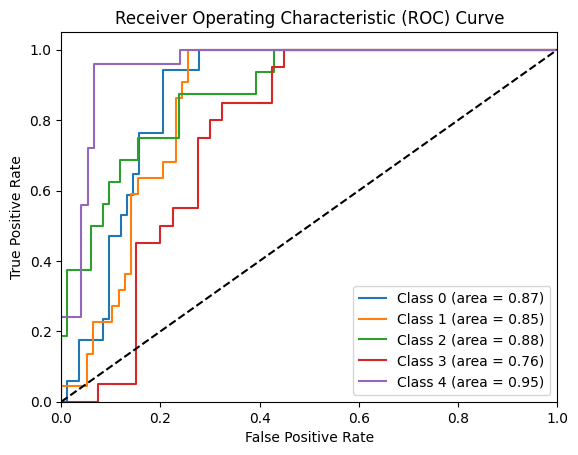

In [21]:
conf(Y_true, Y_pred)

print()

roc_plot(Y2_test, predictions)

**Testing**

Comparing the performance of model with different configurations and hyperparameters.
Testing the neural network again by icreasing the number of hidden layer neurons and decreasing learning rate

In [22]:
NN_1 = NeuralNetwork(inputLayerNeurons = 2,
                     hiddenLayer1Neurons = 60,
                     hiddenLayer2Neurons = 60,
                     hiddenLayer3Neurons = 60,
                     outLayerNeurons = 5,
                     learning_rate = 0.001,
                     activation_type= 'sigmoid')

for i in range(100000):
    NN_1.train(features_train,Y2_train)
    err = np.mean(np.square(Y2_train - NN_1.feedForward(features_train)))

    if i % 10000 == 0:
      err_list.append(err)
      print(f'Epoch: {i}, error: {err}')

Epoch: 0, error: 0.3195504532810383
Epoch: 10000, error: 0.07541836423444705
Epoch: 20000, error: 0.06911826404111608
Epoch: 30000, error: 0.06653682199590394
Epoch: 40000, error: 0.06467511999107732
Epoch: 50000, error: 0.06326342322622684
Epoch: 60000, error: 0.06210993616312778
Epoch: 70000, error: 0.061123231006535945
Epoch: 80000, error: 0.060254687434696565
Epoch: 90000, error: 0.05947619633361345


In [23]:
predictions1 = NN_1.feedForward(features_test)

Y_true1 = np.argmax(Y2_test, axis=1)
Y_pred1 = np.argmax(predictions1, axis=1)

Confusion Matrix:
[[10  6  1  0  0]
 [ 9 13  0  0  0]
 [ 0  3  9  2  2]
 [ 0  0  3  9  8]
 [ 0  0  0  9 16]]


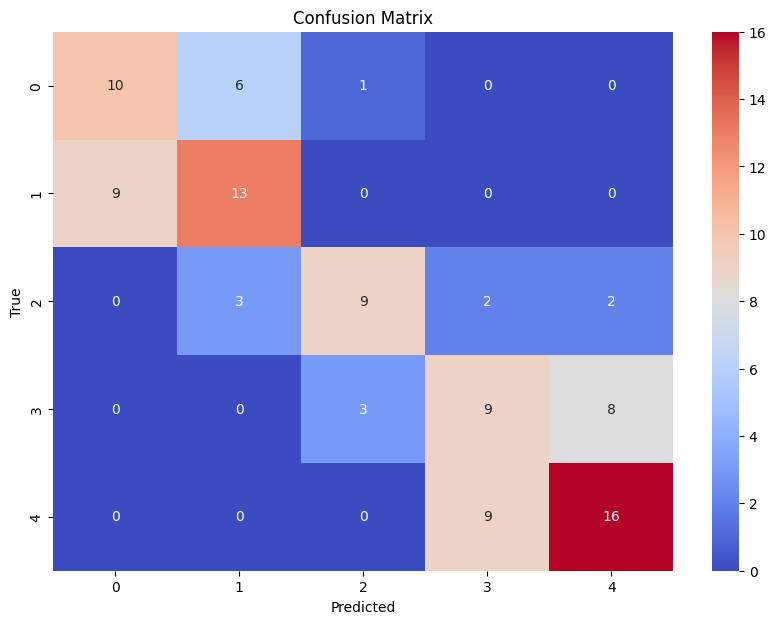

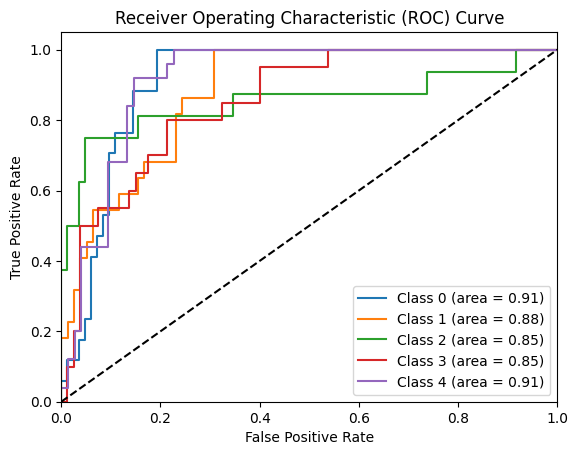

In [24]:
conf(Y_true1, Y_pred1, 'coolwarm')

print()

roc_plot(Y2_test, predictions1)

In [25]:
accuracy = accuracy_score(Y_true1, Y_pred1)
print(f"Overall Accuracy: {accuracy}")

precision = precision_score(Y_true1, Y_pred1, average=None)
print("Precision for each class:")
for i, score in enumerate(precision):
    print(f"Class {i}: {score}")

recall = recall_score(Y_true1, Y_pred1, average='macro')
print(f"Recall: {recall}")

f1 = f1_score(Y_true1, Y_pred1, average='macro')
print(f"F1 Score overall: {f1}")

Overall Accuracy: 0.57
Precision for each class:
Class 0: 0.5263157894736842
Class 1: 0.5909090909090909
Class 2: 0.6923076923076923
Class 3: 0.45
Class 4: 0.6153846153846154
Recall: 0.5663288770053476
F1 Score overall: 0.5689210564058435


### **Conclusion**


**Summary**

In case - 1 where the number of hidden layer neurons were 10 the overall accuracy of the model was `54%`. However, in case - 2 where the number of hidden layer neurons incresead to 60 the accuracy of the model degraded and it was `57%`

With a training set of 200 combinations and 100 for testing the Neural Network was able to classify although the accuracy rate was not that much and it varies depending on the dataset.

In case 1:

Overall Accuracy: `0.54`,
Precision for each class:
Class 0: `0.4642857142857143`,
Class 1: `0.5`,
Class 2: `0.5555555555555556`,
Class 3: `0.43478260869565216`,
Class 4: `0.7894736842105263`,
Recall: `0.5524866310160428`,
F1 Score overall: `0.5331777418507924`

In case 2:

Overall Accuracy: `0.57`,
Precision for each class:
Class 0: `0.5263157894736842`,
Class 1: `0.5909090909090909`,
Class 2: `0.6923076923076923`,
Class 3: `0.45`,
Class 4: `0.6153846153846154`,
Recall: `0.5663288770053476`,
F1 Score overall: `0.5689210564058435`

In both cases the `sigmoid` activation function performed better than other functions.

**Challenges**

As the number of neurons in the hidden layer increased te accuracy was degraded for our dataset. The accuracy could be improve by changing learning rates and different parameters. We had 4 functions, tanh, sigmoid Relu, gaussian. Our dataset contained both positive and negative integers therefore tanh and sigmoid performed significantly better compare to other functions cause both of them limit the output to either `[0, 1]` or the `[-1, 1]`. The output labels were 1-hot encoded thats why sigmoid performed better.

**Improvements**

Neural Network can be improved by changing the learning rates, hyperparameter values, hidden layers and activation functions. In our case ReLu performed poorly due to numerical dataset however ReLU is widely used in CNNs for image classification, object detection, and image segmentation due to its ability to preserve spatial information and learn complex features.